<h2>Import Libs</h2>

In [1]:
# working with the data and vizualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre- processing
from sklearn.preprocessing import StandardScaler

# K-cross validation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score

# seed
RSEED = 10

#saving models as plk files
from joblib import Parallel, delayed
import joblib

Printing configuration

In [2]:
#print float number with 6 digit after the decimal point
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [3]:
# helper functions

def k_cross_validation(x_features, y_label, k):
  """
  create 10 varsions of the train-test data with ratio of 90:10
  """
  # Split the dataset into 10 folds
  kf = KFold(n_splits=k, shuffle=True)
  # k-cross validation splits list
  kcv_list = []

  # Iterate through the folds
  for train_index, test_index in kf.split(x_features):
      # Split the train and test sets
      print(train_index)
      X_train, X_test = x_features.iloc[train_index,:], x_features.iloc[test_index,:]
      y_train, y_test = y_label.iloc[train_index], y_label.iloc[test_index]
      batch = [X_train, y_train, X_test, y_test]
      kcv_list.append(batch)
  return kcv_list

<h2>Data pre-processing and visualization</h2>

In [15]:
docs_df = pd.read_csv("../../ClassificationModelsDatasets/Concatenated-DF.csv")

In [16]:
docs_df

,Unnamed: 0,bibliometr,analysi,explain,artifici,intellig,field,jose,alonso,ciro,...,4â€“8,dittrich,geppert,448â€“461,sluy,remesh,asolid,447â€“467,08468stat,Y-LABEL
0,0,0.000000,0.000000,0.242432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,0.000000,0.126682,0.000000,0.000000,0.000000,0.349517,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,0.000000,0.126682,0.597589,0.264099,0.605286,0.553972,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,0.152958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000000,0.000000,0.000000,0.000000,0.215607,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.000000,0.000000,0.152958,0.000000,0.215607,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
96,96,0.000000,0.159855,0.484865,0.418587,0.500624,0.699034,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
97,97,1.957005,0.000000,0.000000,0.000000,0.215607,0.553972,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
98,98,0.000000,0.000000,0.429407,0.264099,0.341729,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [17]:
# remove first col-(number of row(irrelevant))
docs_df= docs_df.iloc[:,1:]

In [20]:
# normalazie the x-features
scaler = StandardScaler()
x_features = docs_df.iloc[:, 0:48362]
x_features_scaled = scaler.fit_transform(x_features)

# concanted with the y-label
scaled_df = np.concatenate((x_features_scaled, docs_df.iloc[:,-1:]), axis=1)

<h3>Dimensionality Reduction</h3>
After we normalize our data, lets try to extract the relavant features from it by using PCA. It will also help us to visualize our data.

In [21]:
# lets choose the create 75 components
components = 75

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(x_features_scaled)

PCA(n_components=75)

In [22]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[5.99423364 4.77462196 4.25078024 3.3782839  2.71463769 2.55466387
 2.44338101 2.29663613 2.08278617 2.00475264 1.88854454 1.81231026
 1.78653288 1.75326932 1.68624145 1.6154994  1.48201736 1.47124742
 1.4532271  1.44560263 1.43576575 1.38184005 1.34936885 1.32366875
 1.31730633 1.26760787 1.22150922 1.18330469 1.14255208 1.11688152
 1.07591703 1.05594124 1.05091114 1.01837147 1.00797119 1.00688448
 0.99499064 0.98794886 0.97375484 0.96776988 0.9500964  0.94296777
 0.90538319 0.88019329 0.87259007 0.77572369 0.76863173 0.75755095
 0.73162014 0.71898861 0.70468969 0.68334117 0.6740367  0.66769003
 0.64381076 0.63533212 0.61976018 0.61415259 0.59573563 0.58811195
 0.57270706 0.56783721 0.55294328 0.54253146 0.51844725 0.51189017
 0.50648157 0.48925103 0.48087378 0.46956915 0.45547294 0.43120145
 0.41949728 0.41604746 0.38328759]



In [23]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 5.99423364 10.7688556  15.01963584 18.39791974 21.11255743 23.6672213
 26.11060231 28.40723843 30.4900246  32.49477724 34.38332178 36.19563204
 37.98216492 39.73543424 41.4216757  43.03717509 44.51919245 45.99043988
 47.44366697 48.8892696  50.32503535 51.7068754  53.05624425 54.37991301
 55.69721933 56.96482721 58.18633643 59.36964112 60.5121932  61.62907472
 62.70499174 63.76093298 64.81184412 65.83021559 66.83818678 67.84507127
 68.8400619  69.82801077 70.8017656  71.76953548 72.71963188 73.66259965
 74.56798284 75.44817613 76.32076619 77.09648988 77.86512161 78.62267255
 79.35429269 80.07328131 80.777971   81.46131217 82.13534887 82.80303891
 83.44684966 84.08218178 84.70194196 85.31609455 85.91183018 86.49994213
 87.07264919 87.6404864  88.19342968 88.73596115 89.25440839 89.76629856
 90.27278013 90.76203116 91.24290494 91.71247408 92.16794702 92.59914846
 93.01864574 93.4346932  93.81798079]



Text(0, 0.5, 'Explained variance (%)')

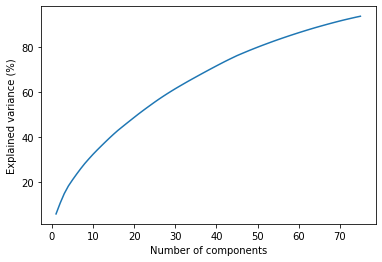

In [24]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


As we can see we can explain about 95% of the varience in the data using 75 principal components. using those 75 components we can train our model
using much less features and therefore:
- train our models much faster.
- avoid to complex model that tend to overfitting.

In [25]:
# extract 75 PC's from our x-features
X_pca = pca.transform(x_features_scaled)
print(X_pca.shape)

(100, 75)


In [26]:
# concanted with the y-label
train_test_data = np.concatenate((X_pca, docs_df.iloc[:,-1:]), axis=1)
train_test_data.shape

(100, 76)

<h3>Visualize the data using T-sne</h3>

In [27]:
betsne = TSNE()
# transform the x- features
X_embedded = tsne.fit_transform(train_test_data[:,:75])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [28]:
# concanted with the y-label
embedded_df = np.concatenate((X_embedded, docs_df.iloc[:,-1:]), axis=1)

In [29]:
# rename y-col
embedded_df = pd.DataFrame(embedded_df)
embedded_df.rename(columns={2: 'Category'}, inplace=True)

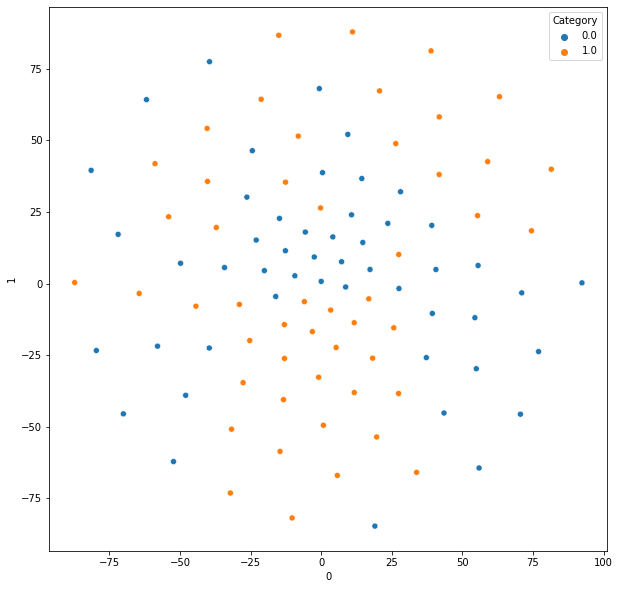

In [30]:
# create plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedded_df, x=0, y=1, hue='Category')

It seems like our categories(belong to explaing AI(1), not belong to explaing Ai(0)), are not linearly separated.

<h3>K-cross validation<h3>

In [ ]:
"../ClassificationModelsDatasets/Concatenated-DF.csv"# using k = 10
kcv_list = k_cross_validation(x_features=pd.DataFrame(train_test_data[:,:75]), y_label=docs_df.iloc[:,-1:], k=10)

<h2>Applying classification models</h2>

<h3>KNN</h3>

In [ ]:
best_classifier_knn = None
best_accu_knn = 0
best_x_test_knn = None
best_y_test_knn = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  knn = KNeighborsClassifier()

  # define parameter grid
  parameters_grid = {
      'n_neighbors': [ 3, 5, 10],
      'weights': ['uniform', 'distance']
  }

  # define grid search
  grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid)


  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_knn:
    best_accu_knn = acc
    best_classifier_knn = best
    best_x_test_knn = x_test
    best_y_test_knn = y_test

<H3>Evaluate the model</H3>

In [33]:
print("KNN best classifier accuracy is {}".format(best_accu_knn))

KNN best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


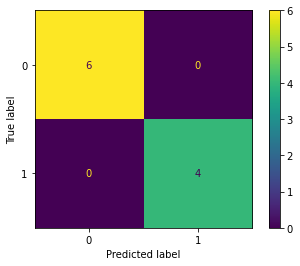

,sensitivity,specificity
0,1.000000,1.000000


In [34]:
# confusion matrix
y_pred = best_classifier_knn.predict(best_x_test_knn)
plot_confusion_matrix(best_classifier_knn, best_x_test_knn, best_y_test_knn)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_knn, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>SVM</h3>

In [ ]:
best_classifier_SVM = None
best_accu_SVM = 0
best_x_test_SVM = None
best_y_test_SVM = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  clf = svm.SVC(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'C': [0.1, 0.5,0.7,1.2,1.5,20,40,60],
      'kernel': ['linear', 'poly','rbf', 'sigmoid'],
      'degree': [3,4],

  }

  # define grid search
  grid_search = GridSearchCV(estimator=clf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_SVM:
    best_accu_SVM = acc
    best_classifier_SVM = best
    best_x_test_SVM = x_test
    best_y_test_SVM = y_test

<H3>Evaluate the model</H3>

In [36]:
print("SVM best classifier accuracy is {}".format(best_accu_SVM))

SVM best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


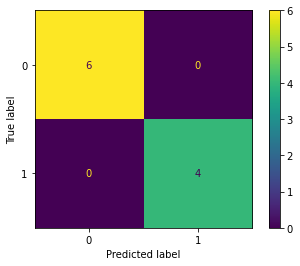

,sensitivity,specificity
0,1.000000,1.000000


In [37]:
# confusion matrix
y_pred = best_classifier_SVM.predict(best_x_test_SVM)
plot_confusion_matrix(best_classifier_SVM, best_x_test_SVM, best_y_test_SVM)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_SVM, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Random Forest</h3>

In [ ]:
best_classifier_RF = None
best_accu_RF = 0
best_x_test_RF = None
best_y_test_RF = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define model
  rf = RandomForestClassifier(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'max_depth': [2, 3, 4, 6],
      'min_samples_split': [2, 4, 8],
      'min_samples_leaf': [2, 8],
      'n_estimators': [50,70,100]
  }
   # define grid search
  grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_RF:
    best_accu_RF = acc
    best_classifier_RF = best
    best_x_test_RF = x_test
    best_y_test_RF = y_test

<h3>Evaluate the model</h3>

In [39]:
print("Random forest best classifier accuracy is {}".format(best_accu_RF))

Random forest best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


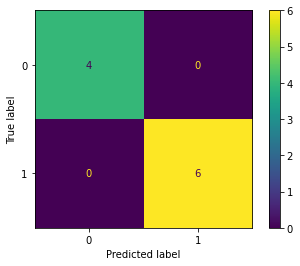

,sensitivity,specificity
0,1.000000,1.000000


In [40]:
# confusion matrix
y_pred = best_classifier_RF.predict(best_x_test_RF)
plot_confusion_matrix(best_classifier_RF, best_x_test_RF, best_y_test_RF)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_RF, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Navie Bayes</h3>

In [ ]:
best_classifier_NB = None
best_accu_NB = 0
best_x_test_NB = None
best_y_test_NB = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define parameter grid
  param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
  }

  # define and train the model
  grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_NB:
    best_accu_NB = acc
    best_classifier_NB = best
    best_x_test_NB = x_test
    best_y_test_NB = y_test

<h3>Evaluate the model</h3>

In [42]:
print("Navie Bayes best classifier accuracy is {}".format(best_accu_NB))

Navie Bayes best classifier accuracy is 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


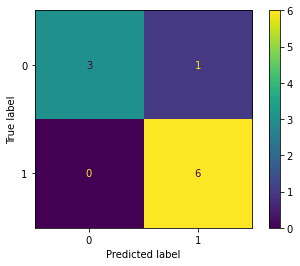

,sensitivity,specificity
0,0.750000,1.000000


In [43]:
# confusion matrix
y_pred = best_classifier_NB.predict(best_x_test_NB)
plot_confusion_matrix(best_classifier_NB, best_x_test_NB, best_y_test_NB)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_NB, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Summery</h3>
Overall it seems that most of the classifiers managed to learn well from<br>
our representaion of the data and achived the highest accuracy, only Navie bayse had 1 mistake (classified a sample which is not relayted to the category as relayted to the category) 

In [ ]:
# saving the best classifiers of all the 4 models
joblib.dump(best_classifier_knn, '../../TrainedClassificationModels/KNN_classifier.pkl')
joblib.dump(best_classifier_SVM, '../../TrainedClassificationModels/SVM_classifier.pkl')
joblib.dump(best_classifier_RF, '../../TrainedClassificationModels/RF_classifier.pkl')
joblib.dump(best_classifier_NB, '../../TrainedClassificationModels/NB_classifier.pkl')